In [52]:
from IPython.display import display

import numpy as np
import pandas as pd


def show_df(_df):
    display(_df.head())
    print(_df.shape)

In [2]:
df_data = pd.read_csv('Walmart.csv')

show_df(df_data)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


(6435, 8)


<AxesSubplot:>

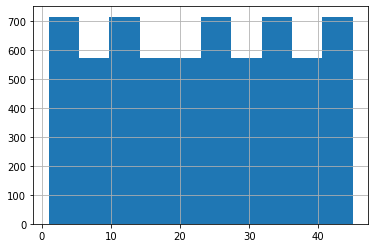

In [10]:
df_data.Store.hist()

In [20]:
df_data.groupby('Store')['Store'].count()

Store
1     143
2     143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
22    143
23    143
24    143
25    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
45    143
Name: Store, dtype: int64

In [79]:
df_store = df_data.query('Store == 1')

show_df(df_store)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


(143, 8)


In [80]:
df_store.query('Holiday_Flag == 1')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742
83,1,09-09-2011,1540471.24,1,76.00,3.546,215.861056,7.962
94,1,25-11-2011,2033320.66,1,60.14,3.236,218.467621,7.866
99,1,30-12-2011,1497462.72,1,44.55,3.129,219.535990,7.866
105,1,10-02-2012,1802477.43,1,48.02,3.409,220.265178,7.348
135,1,07-09-2012,1661767.33,1,83.96,3.730,222.439015,6.908


In [82]:
sales = df_store.Weekly_Sales

sales.max(), sales.min(), sales.mean(), sales.std()

(2387950.2, 1316899.31, 1555264.3975524479, 155980.76776119988)

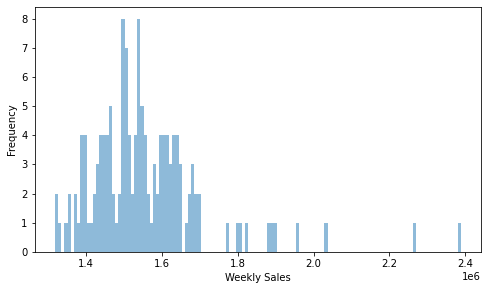

In [100]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 4.5))

sales.plot.hist(bins=128, alpha=0.5)
plt.xlabel('Weekly Sales')

plt.savefig('frequency.png')

plt.show()

In [74]:
from scipy import stats

miu_hat = sales.mean()
sigma_hat = sales.std()
sem = sales.sem()

ci = stats.t.interval(
    alpha=.95,
    df=sales.size - 1,
    loc=miu_hat,
    scale=sem
)

print(f'{miu_hat:,.0f}')
print(f'{sigma_hat:,.0f}')
print(f'{sem:,.0f}')
print([f'{_i:,.0f}' for _i in ci])

1,555,264
155,981
13,044
['1,529,479', '1,581,049']


In [103]:
# H0: Walmart store 1 weekly sale equals to population mean
# Ha: Walmart store 1 weekly sale doesn't equal to population mean

pop_mean = 1.53e6

stats.ttest_1samp(sales, pop_mean, alternative='greater')

Ttest_1sampResult(statistic=1.9368942580925879, pvalue=0.027371918869434537)

In [105]:
(miu_hat-1530000)/sem

1.9368942580926056